# Water Model Notebook

In [1]:
from graphmodels.utils import parse_parameter_json
from models.Sarah.WaterModel import WaterModel

In [2]:
# For now still using old parameters, to be updated
parameters = parse_parameter_json('models/Sarah/parameter_water.json')
inputs = {'ET':0,
          'A':0,
          'WSE': 0.85,
          'ASF': 3,
          'BF': 6}

inputs_parameters = parameters.copy()
inputs_parameters.update(inputs)

In [3]:
results = WaterModel.run(inputs_parameters)

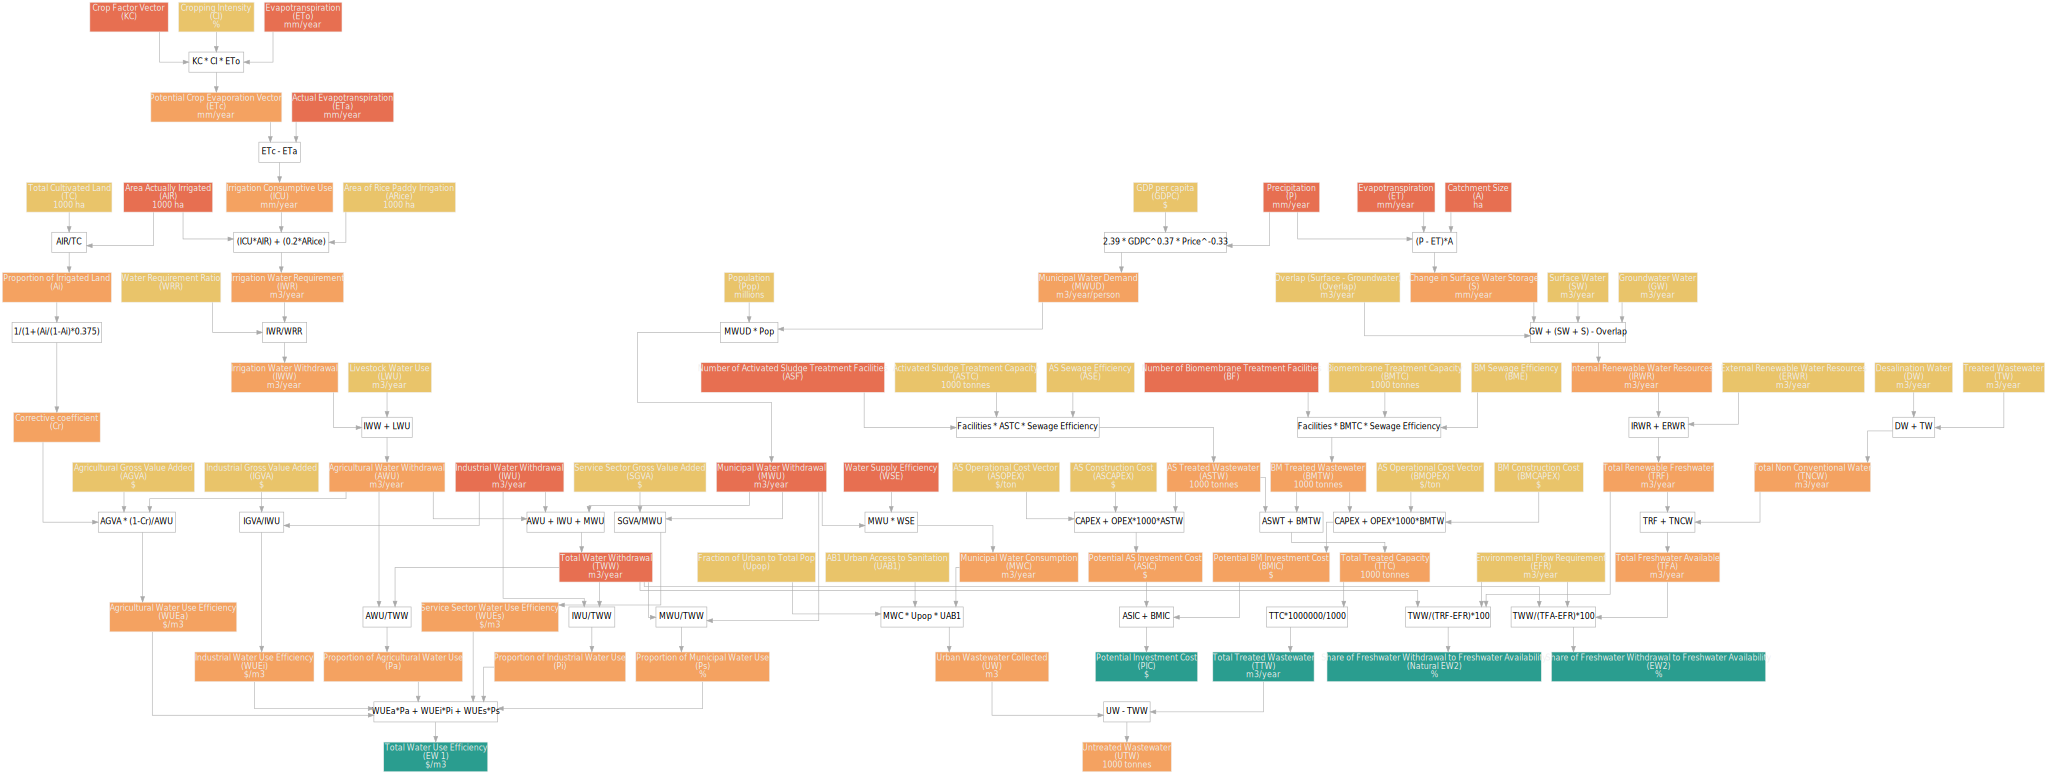

In [4]:
plot = WaterModel.draw()
plot

In [5]:
plot.render('outputs/sarah/watermodel')
WaterModel.summary_df.to_csv('outputs/sarah/watermodel_summary.csv')

In [6]:
print(WaterModel.summary_df.to_string()) # to big

                                                                  name       type            unit                             computation
id                                                                                                                                       
KC                                                  Crop Factor Vector      input                                                     NaN
CI                                                  Cropping Intensity  parameter               %                                     NaN
ETo                                                 Evapotranspiration      input         mm/year                                     NaN
ETc                                  Potential Crop Evaporation Vector   variable         mm/year                           KC * CI * ETo
ETa                                          Actual Evapotranspiration      input         mm/year                                     NaN
ICU                               